# HomeWork 4
#### Mohammad Javad Hezareh
#### 98101074

---
libraries and load data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read data
data = pd.read_csv('data.csv', index_col= 0)

data_count = data.shape[0]
data.shape

(200, 3)

---
### A
Split data to train and test set and draw their scatter plot

In [3]:
# separate data to train_data and test_data
ALPHA = 0.8
idx = range(data_count)
train_count = int(ALPHA * data_count)

train_idx = np.random.choice(idx, train_count, replace=False)
test_idx = list(filter(lambda x: x not in train_idx, idx))

train_data = data.loc[train_idx, :]
test_data = data.loc[test_idx, :]

train_data.head()

,X1,X2,Y
99,0.133137,1.202744,1
146,0.438365,-0.782343,-1
185,-1.515076,-0.538719,1
23,1.128785,-0.697810,1
164,1.107708,0.244544,-1


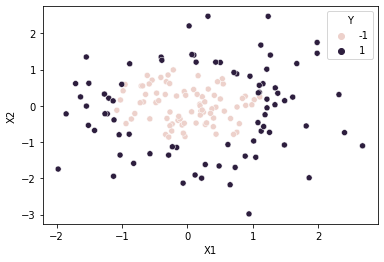

In [4]:
# draw data
sns.scatterplot(data=train_data, x='X1', y="X2", hue='Y');

---
### B
Implement Adaboost algorithm

In [5]:
from sklearn.tree import DecisionTreeClassifier
from functools import reduce

In [6]:
def ada_boost(data, max_iter=10):
    alphas = []
    classifiers = []
    
    X = data.drop(columns='Y').values
    Y = data['Y'].values
    m = data.shape[0]
    
    D = [1/m for _ in range(m)]
    
    for t in range(max_iter):
        H = DecisionTreeClassifier(max_depth=1, random_state=1)
        H.fit(X, Y, sample_weight=D)
        classifiers.append(H)
        predicted = H.predict(X)
        error = np.sum((predicted != Y)*D)
        a = 0.5 * np.log(1/error - 1)
        alphas.append(a)
        normalizer = 2.0 * np.sqrt(error*(1-error))
        
        new_dist = lambda d, y, p: (d*np.exp(-a*y*p))/normalizer
        D = list(map(new_dist, D, Y, predicted))
    
    f = lambda x: reduce(lambda f, g: f+g, map(lambda a, h: a*h.predict(x), alphas, classifiers))
    return f    

train_accuracy:0.975


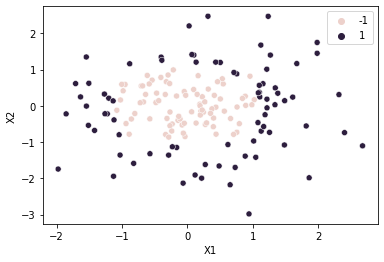

In [7]:
f = ada_boost(train_data, max_iter=50)
predicted = f(train_data.drop(columns='Y').values) >= 0
predicted = np.where(predicted, 1, -1)
train_acc = np.sum(predicted == train_data['Y'].values)/train_data.shape[0]

print(f'train_accuracy:{train_acc}')
sns.scatterplot(data=train_data, x='X1', y='X2', hue=predicted);

---
### C
Use trained function (f) to predict test set

test_accuracy:0.975


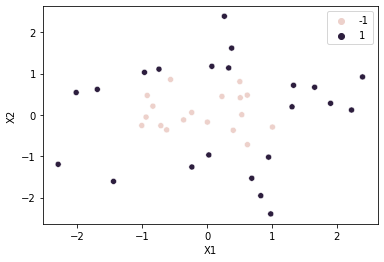

In [8]:
test_predicted = np.where(f(test_data.drop(columns='Y')) >= 0, 1, -1)
test_accuracy = np.sum(test_predicted == test_data['Y'].values)/test_data.shape[0]

print(f'test_accuracy:{test_accuracy}')
sns.scatterplot(data=test_data, x='X1', y='X2', hue=test_predicted);